Accuracy 0.9866666666666667
Best K: 1
Best Score: 0.9866363761531047


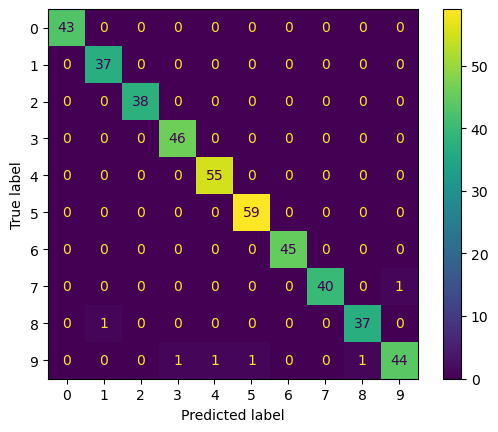

In [4]:
# Importing required libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load digits dataset
digits = load_digits()

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=42
)

import sys
sys.path.append('../src')
from knn_model import train_knn

# Train KNN model
model = train_knn(X_train, y_train, n_neighbors=3)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy", accuracy_score(y_test, y_pred))

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

# PCA for Dimensionality Reduction
from sklearn.decomposition import PCA

# Reduce to 2 principal components for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(digits.data)

# Try different n_neighbors to find the best
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 10)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best K:", grid.best_params_['n_neighbors'])
print("Best Score:", grid.best_score_)